In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

2025-11-08 15:50:24.761986: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762617025.118045      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762617025.233602      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [ ]:
path = '/kaggle/input/face-expression-recognition-dataset/images/validation/'

In [ ]:
image_names = os.listdir(path)
print(f"Total de imágenes encontradas: {len(image_names)}")

Total de imágenes encontradas: 7


In [ ]:
images = []
image_paths = []

for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            
            images.append(img_array)
            image_paths.append(img_path)

images = np.vstack(images)

print(f"Total imágenes cargadas: {len(images)}")

Total imágenes cargadas: 7066


In [ ]:
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

2025-11-08 15:52:07.046550: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
features = model.predict(images, batch_size=32, verbose=1)
print(f"Forma de los vectores de características: {features.shape}")

221/221 ━━━━━━━━━━━━━━━━━━━━ 1771s 8s/step
Forma de los vectores de características: (7066, 4096)


In [ ]:
pca = PCA(n_components=50)
features_pca = pca.fit_transform(features)

print(f"Forma después de PCA: {features_pca.shape}")

Forma después de PCA: (7066, 50)


In [ ]:
n_clusters = 7

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(features_pca)

print(f"Etiquetas de clustering asignadas: {np.unique(clusters)}")

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Etiquetas de clustering asignadas: [0 1 2 3 4 5 6]


In [ ]:
silhouette_avg = silhouette_score(features_pca, clusters)
print(f"Coeficiente de silueta (Silhouette Score): {silhouette_avg:.4f}")

Coeficiente de silueta (Silhouette Score): 0.0546


In [ ]:
def show_cluster_examples(cluster_label, n_examples=5):
    indices = np.where(clusters == cluster_label)[0]
    
    plt.figure(figsize=(15, 3))
    
    for i, idx in enumerate(indices[:n_examples]):
        img_path = image_paths[idx]
        img = image.load_img(img_path, target_size=(224, 224))
        
        plt.subplot(1, n_examples, i + 1)
        plt.imshow(img)
        plt.axis('off')
    
    plt.suptitle(f"Ejemplos del Cluster {cluster_label}", fontsize=16)
    plt.show()

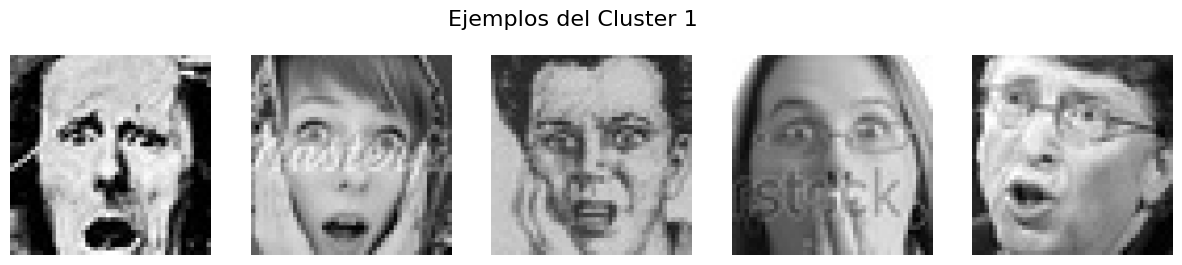

In [11]:
# ============================
# MOSTRAR EJEMPLOS DE CLUSTERS
# ============================

# Cambia el número para ver otros clusters (0,1,2,...)
show_cluster_examples(cluster_label=1, n_examples=5)